In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import time

![asd](./img/1.PNG)

![asd](./img/2.PNG)

## But first.. KNN

In [5]:
movie_Data = pd.read_csv('ITcourse.csv',sep=',')
Raw_movie = pd.read_csv('movies.csv')
genre = pd.read_csv('genre_for_knn.csv')

In [3]:
movie_Data.head(2)

movieId   1   2   3   4   5   6    7   8    9 ...   662  663  664  665  \
0        1 NaN NaN NaN NaN NaN NaN  3.0 NaN  4.0 ...   NaN  4.0  3.5  NaN   
1        2 NaN NaN NaN NaN NaN NaN  NaN NaN  NaN ...   5.0  NaN  NaN  3.0   

   666  667  668  669  670  671  
0  NaN  NaN  NaN  NaN  4.0  5.0  
1  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 672 columns]

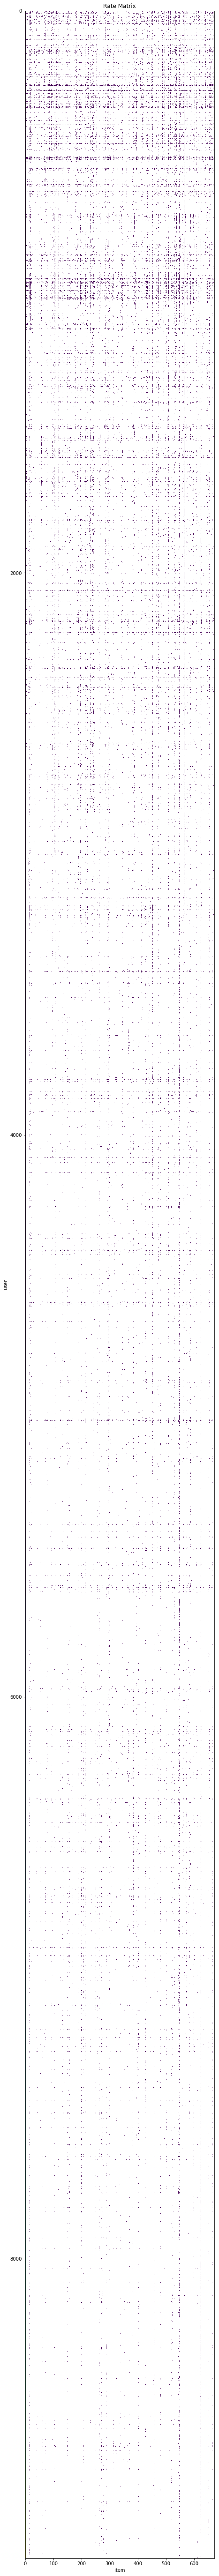

In [4]:
plt.figure(figsize=(200, 100))
plt.imshow(movie_Data)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

In [6]:
movie_Data = movie_Data.fillna(0.0)
index_movie = movie_Data.movieId
datMat = np.transpose(np.array(movie_Data))
datMat[0,:]

array([  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
         1.62542000e+05,   1.62672000e+05,   1.63949000e+05])

In [11]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric = 'euclidean', algorithm = 'auto')
knn.fit(datMat)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [8]:
dic = ['Animation',
 'Crime',
 'Musical',
 'Adventure',
 'Fantasy',
 'Documentary',
 'Sci-Fi',
 'Comedy',
 'Mystery',
 'Horror',
 'Thriller',
 'Romance',
 'IMAX',
 'War',
 '(no genres listed)',
 'Action',
 'Film-Noir',
 'Children',
 'Western',
 'Drama']

In [12]:
num_neighbor = 10
test_num = 100
correct = 0



for c in range(test_num):
    query_index = np.random.choice(datMat.shape[0])
    _, indices = knn.kneighbors(datMat[query_index, :].\
                                       reshape(1,-1),n_neighbors=num_neighbor)

    true_label = list()
    test_label = list()
    a = list()
    for i in range(num_neighbor):
        movie = Raw_movie[Raw_movie['movieId'] == index_movie[int(indices[:,i])]]
        if i == 0:
            t = movie['genres'][movie.index[0]].split('|')
            for j in range(len(t)):
                true_label.append(t[j])
        else:
            t = movie['genres'][movie.index[0]].split('|')
            for j in range(len(t)):
                test_label.append(t[j])                
        if i == num_neighbor-1:
            max_count= 0
            max_idx = 0
            for k in range(len(dic)):
                if max_count < test_label.count(dic[k]):
                    max_count = test_label.count(dic[k])
                    max_idx = k
            for p in range(len(true_label)):
                if true_label[p] == dic[max_idx]:

                    correct += 1
print(correct/test_num)

0.53
